## `Central Limit Theorem`

If samples of size n are drawn randomly from a population that has a mean ***µ*** of and a standard deviation of ***σ***, the sample means, ***x̅***, are approximately normally distributed for sufficiently large sample sizes ***(n >= 30)*** regardless of the shape of the population distribution. If the population is normally distributed, the sample means are normally distributed for any size sample.


From mathematical expectation, it can be shown that the mean of the sample means is the population mean. 

			x̅ = µ
and the standard deviation of the sample means (called the standard error of the mean) is
the standard deviation of the population divided by the square root of the sample size.
			
            s=(σ)/√n


In [1]:
import numpy as np
import pandas as pd

# For Visual plots and graphics
import matplotlib.pyplot as plt
import seaborn as sns
# For animated plots and graphs
import matplotlib.animation as animation

# for generating population distribution
from scipy.stats import uniform, norm, expon

# For random numbers 
import random
import time


In [12]:
def PDF(data):
    mu = np.mean(data)
    std = np.std(data)
    plt.figure(figsize = (15,7))
    ax = sns.distplot(data,
                      bins=50,
                      kde=False,
                      color='green',
                      hist_kws={"linewidth": 15,'alpha':1,'linewidth': 1, 'edgecolor':"r"})
    ax.set(xlabel='Population Values', ylabel='Frequency')
    plt.title("Population Distribution", fontsize=15)
    lab = "µ = {}, σ = {}".format(round(mu,3),round(std,3))
    ax.legend(labels = [lab])

In [3]:
def exponential_dist(n,lmb):
    # random numbers from exponential distribution
    # Generate PDF for a size of n with lambda (scale = 1/lambda)
    scl = 1/lmb
    data_expon = expon.rvs(scale=scl, size = n)
    
    return data_expon
    

In [4]:
def uniform_dist(n,a,b):
    # random numbers from uniform distribution
    data_uniform = uniform.rvs(size=n, loc = a, scale=b)

    return data_uniform

*For the purpose of demonstration, separate functions have been created for generating __exponential__ and __uniform__ population distribution to conduct the CLT simulation. Below shown example generates a population distribution.*

<IPython.core.display.Javascript object>


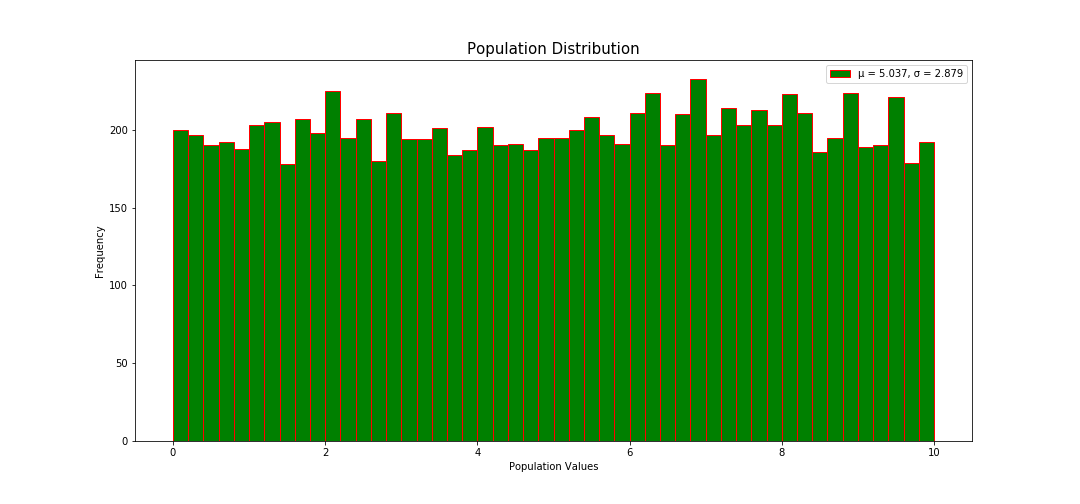

In [13]:
# Use exponential_dist() to generate uniform distribution : size, lambda
# Use uniform_dist() to generate uniform distribution : size, start, end

popu_dist = uniform_dist(10000,0,10)
PDF(popu_dist)

## CLT Simulation Experiment

Below written is a custom made function for CLT simulation experiment. 
The function will accept three parameters: Population data, sample size (will accept a list of sample sizes, max. 4), total no. of samples.

Using this simulation function, we can check if the following statements stands true:

*  *The mean of the sampling distribution of means, **x̅** must be closer to the value of the population mean, **µ**.*
*  *The shape of the sampling distribution of means should be approximately follow a normal distribution.*
*  *The standard deviation of the sampling distribution of means, **s** should be nearly equal to **(σ)/√n**.*



In [6]:
def clt_simulation(popu, n, samples):
    sample_means = list()
    total_samples = samples
    sample_size = n
    g = globals()

    plt.figure(figsize=(15,12))

    # Sampling distribution of means is recorded for different sample sizes
    for i in range(len(sample_size)):                        # Iteration for different sample sizes
        g['sample_means_{0}'.format(i)] = list()
        mu_list = g['sample_means_{0}'.format(i)]
        
        for _ in range(total_samples):                       # Nested iteration for total no. of samples
            sample = random.choices(popu, k=sample_size[i])
            mu_list.append(np.mean(sample))                  # sample means is recorded for each samples

        
        # Kernel Density Estimation plot of the sample means
        plt.subplot(2,2,i+1)
        ax = sns.distplot(mu_list,
                          bins=100,
                          color='skyblue',
                          hist_kws={"linewidth": 15,'alpha':1},
                          kde_kws={"color": "r", "lw": 1, "label": "PDF"})

        normal_title='sample size ={}'.format(sample_size[i])
        plt.title(normal_title,fontsize=15)
        ax.set(xlabel='Sample Means', ylabel='Frequency')

        # 95% confidence interval for the sampling distribution
        sample_mu = np.mean(mu_list)
        sample_std = np.std(mu_list)
        pop_std = np.std(popu)
        CI_lb = sample_mu - (1.96*(pop_std/np.sqrt(sample_size[i])))    # Lower bound of the C.I
        CI_ub = sample_mu + (1.96*(pop_std/np.sqrt(sample_size[i])))    # Upper bound of the C.I
        v_len = (1/(sample_std*np.sqrt(2*np.pi)))*np.exp(-0.5)

        lab1 = "x̅ = {}, s = {}".format(round(sample_mu,3),round(sample_std,3))
        plt.plot([sample_mu,sample_mu],[0,v_len], 'k-', lw=4, color='green',label=lab1)
        
        lab2 = "95% Confidence Interval = \n[{},{}]".format(round(CI_lb,3),round(CI_ub,3))
        plt.plot([CI_lb,CI_lb],[0,v_len], 'k-', lw=4, color='blue',label=lab2)
        plt.plot([CI_ub,CI_ub],[0,v_len], 'k-', lw=4, color='blue')
        
        plt.legend()

    plt.show()

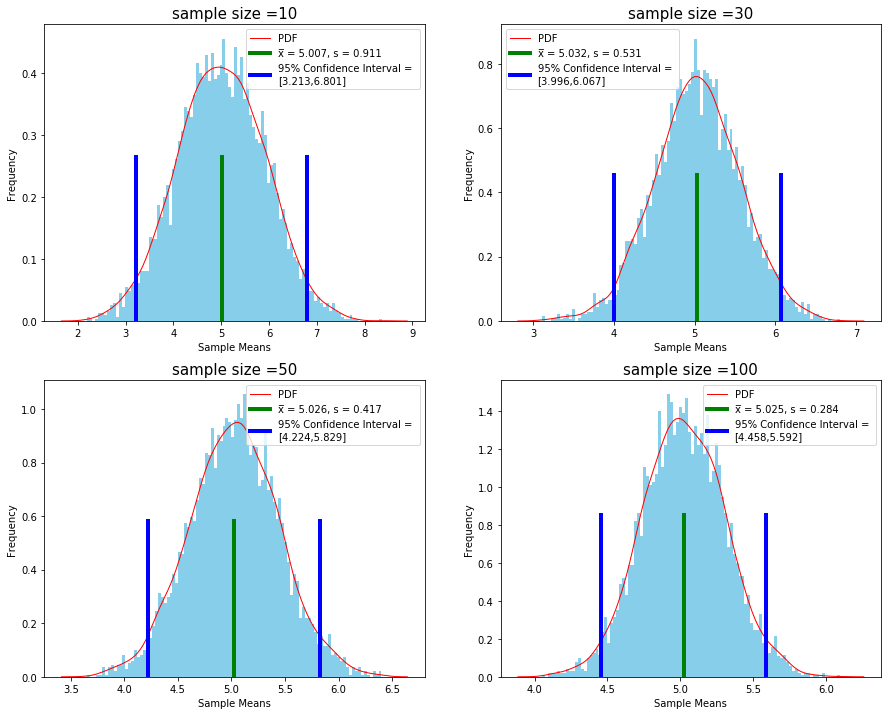

In [7]:
# For Normal plots
%matplotlib inline

# Calling the CLT simulation function
clt_simulation(popu_dist,[10, 30, 50, 100],5000)

## `Inferences`

Following observations can be seen from the above simulations:

* The sample mean is nearly equal to the population mean, *µ*. Also sample standard deviation is approximately equals to *(σ)/√n*.
* With large sample size (n >= 30), the sampling distribution of means closely follows a normal distribution.
* Keeping the total no. of samples same and increasing the sample size, *n*, we observe the peak of the distribution increases.
* Also the standard deviation of the distribution coverges towards the mean as the sample sze increases.
* To understand this better, we can check that 95% C.I of the distribution becomes more stringent as sample size increases.

## CLT Animated Simulation

Below code gives a nice visual of animated plot for CLT. It shows how a sampling distribution of means approximately follows a normal distribution as we take more no. of samples for larger sample size (preferably n >= 30).

From the animation, one can easily understand how larger samples gives a better estimation of the population mean. Visually exploring this  makes it very easy to interpret and understand.

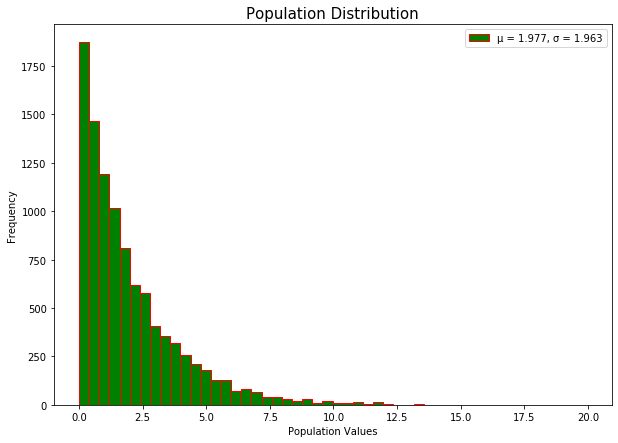

In [8]:
# Modify the parameters below to see the difference
total_samples = 10000
sample_size = 100
popu = exponential_dist(10000, 0.5)
PDF(popu)

<IPython.core.display.Javascript object>


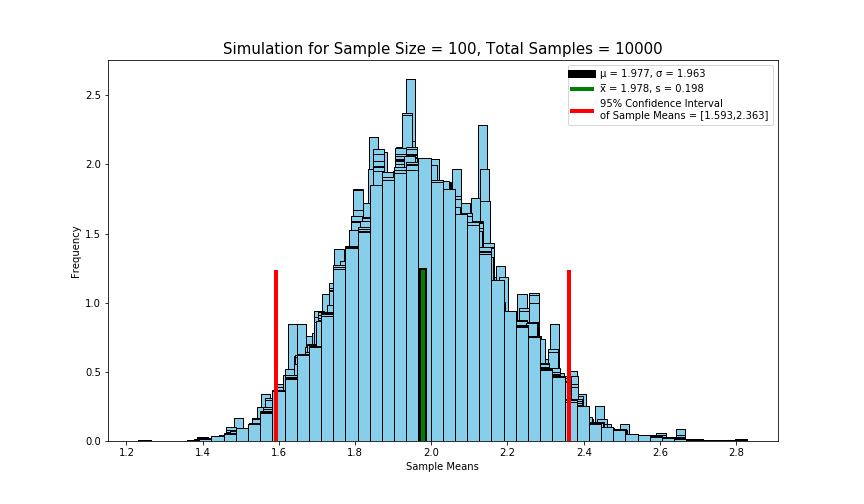

In [11]:
# For interactive plots
%matplotlib notebook 

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)


mu_list = []
for _ in range(total_samples):
    sample = random.choices(popu, k=sample_size)
    mu_list.append(np.mean(sample))

def animate(i):

    data = mu_list[:int((i+1)*500)]
    plt.hist(data, bins=50, color='skyblue', normed=True, linewidth= 1, edgecolor="k")

    tot_samples = int((i+1)*500)
    normal_title='Simulation for Sample Size = {}, Total Samples = {}'.format(sample_size,tot_samples)
    plt.title(normal_title,fontsize=15)
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')

ani = animation.FuncAnimation(fig, animate, frames=int(total_samples/500), blit=False, repeat = False)
ani

# 95% confidence interval for the sampling distribution
sample_mu = np.mean(mu_list)
sample_std = np.std(mu_list)
pop_mu = np.mean(popu)
pop_std = np.std(popu)
CI_lb = sample_mu - (1.96*(pop_std/np.sqrt(sample_size)))
CI_ub = sample_mu + (1.96*(pop_std/np.sqrt(sample_size)))
v_len = (1/(sample_std*np.sqrt(2*np.pi)))*np.exp(-0.5)

lab1 = "µ = {}, σ = {}".format(round(pop_mu,3),round(pop_std,3))
plt.plot([pop_mu,pop_mu],[0,v_len], 'k-', lw=8, color='black',label=lab1)


lab2 = "x̅ = {}, s = {}".format(round(sample_mu,3),round(sample_std,3))
plt.plot([sample_mu,sample_mu],[0,v_len], 'k-', lw=4, color='green',label=lab2)

lab3 = "95% Confidence Interval \nof Sample Means = [{},{}]".format(round(CI_lb,3),round(CI_ub,3))
plt.plot([CI_lb,CI_lb],[0,v_len], 'k-', lw=4, color='red',label=lab3)
plt.plot([CI_ub,CI_ub],[0,v_len], 'k-', lw=4, color='red')

plt.legend()

plt.show()
